In [1]:
import pandas as pd
import os
from glob import glob

# Use glob to match the file pattern and get all file paths
file_paths = 'C:/Users/vbodavul/Documents/Data/merged_rides_with_elevation.csv'

df = pd.read_csv(file_paths)


In [2]:
df
dfs = df

In [3]:
print(df)

                   ride_id  rideable_type        started_at          ended_at  \
0         C2F7DD78E82EC875  electric_bike   1/13/2022 11:59   1/13/2022 12:02   
1         A6CF8980A652D272  electric_bike    1/10/2022 8:41    1/10/2022 8:46   
2         BD0F91DFF741C66D   classic_bike    1/25/2022 4:53    1/25/2022 4:58   
3         CBB80ED419105406   classic_bike     1/4/2022 0:18     1/4/2022 0:33   
4         DDC963BFDDA51EEA   classic_bike    1/20/2022 1:31    1/20/2022 1:37   
...                    ...            ...               ...               ...   
11387550  F74DF9549B504A6B  electric_bike   12/7/2023 13:15   12/7/2023 13:17   
11387551  BCDA66E761CC1029   classic_bike   12/8/2023 18:42   12/8/2023 18:45   
11387552  D2CF330F9C266683   classic_bike   12/5/2023 14:09   12/5/2023 14:13   
11387553  3829A0D1E00EE970  electric_bike   12/2/2023 21:36   12/2/2023 21:53   
11387554  A373F5B447AEA508   classic_bike  12/11/2023 13:07  12/11/2023 13:11   

                     start_

In [4]:


dfs = dfs.drop(columns=['end_altitude', 'end_Altitude', 'Start_Altutude', 'State_Altitude'])

# Replace missing values with some form of imputation if necessary
# For now, we'll just drop rows with NaN in 'End_Altitude'
dfs = dfs.dropna(subset=['End_Altitude'])

In [5]:
from sklearn.impute import SimpleImputer
dfs['Elevation_Change'] = dfs['End_Altitude'] - dfs['Start_Altitude']
# Impute the missing values in 'Elevation_Change'
imputer = SimpleImputer(strategy='mean')  # or strategy='median' if that's more appropriate
dfs['Elevation_Change'] = imputer.fit_transform(dfs[['Elevation_Change']])

# Continue with your model fitting as before


In [6]:
dfs['rideable_type'] = df['rideable_type'].replace({
    'electric_bike': 'electric',
    'docked_bike': 'classic',
    'classic_bike': 'classic'
})

In [7]:
# Optimize data types
for col in ['rideable_type', 'member_casual']:
    dfs[col] = dfs[col].astype('category')

# If 'Elevation_Change' has no decimal values and is within a reasonable range, 
# you can convert it to a smaller integer type
dfs['Elevation_Change'] = pd.to_numeric(dfs['Elevation_Change'], downcast='float')


In [8]:
import gc

# Sample a fraction of the data
dfs_sample = dfs.sample(frac=0.1, random_state=1)
del dfs  # Delete the original dataframe if no longer needed
gc.collect()  # Invoke garbage collector


69

              precision    recall  f1-score   support

           0       0.54      0.01      0.03     87654
           1       0.53      0.99      0.69     96598

    accuracy                           0.53    184252
   macro avg       0.53      0.50      0.36    184252
weighted avg       0.53      0.53      0.37    184252

[[ 1140 86514]
 [  958 95640]]


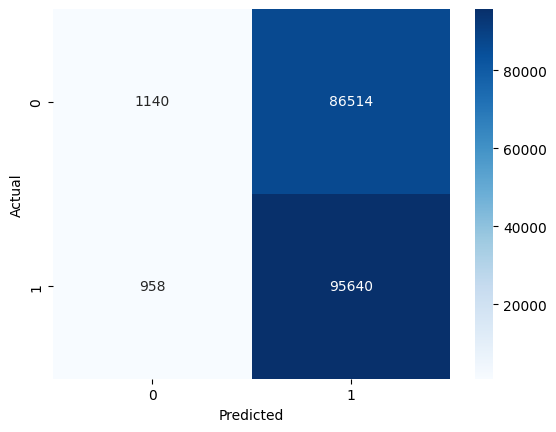

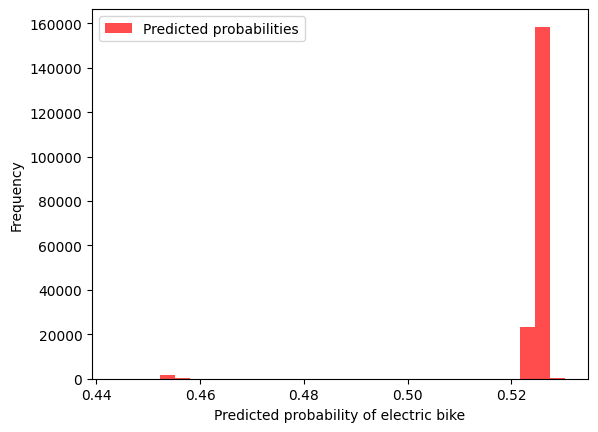

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt



# Encode the categorical target variable 'rideable_type'
label_encoder = LabelEncoder()
dfs_sample['rideable_type_encoded'] = label_encoder.fit_transform(dfs_sample['rideable_type'])

# Define features and target
X = dfs_sample[['Elevation_Change']] 
# Ensure no NaN values in features
X  = X.fillna(X.mean())
# Features
y = dfs_sample['rideable_type_encoded']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Confusion matrix plot
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predicted probabilities for the test set
y_pred_probs = log_reg.predict_proba(X_test)

# Plot of predicted probabilities
plt.hist(y_pred_probs[:, 1], bins=30, alpha=0.7, color='red', label='Predicted probabilities')
plt.xlabel('Predicted probability of electric bike')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assume 'dfs' is your DataFrame and it has been loaded and preprocessed appropriately

# First, handle NaNs before splitting into train and test sets
# Option 1: Impute NaNs (filling NaNs with the mean, median, or another statistic)
imputer = SimpleImputer(strategy='mean')  # Can use 'median' or 'most_frequent' if more appropriate
dfs_sample['Elevation_Change'] = imputer.fit_transform(dfs_sample[['Elevation_Change']])

# Option 2: Drop rows with NaNs
# This should be done only if imputation is not suitable and the number of missing values is not significant
dfs_sample = dfs_sample.dropna(subset=['Elevation_Change'])

# Now split the data into training and testing sets
X = dfs_sample[['Elevation_Change']]  # Assuming 'Elevation_Change' is your feature
y = dfs_sample['rideable_type']  # Assuming 'rideable_type' is your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with model training and evaluation


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Probability needed for certain metrics and ROC curves
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    y_pred = model.predict(X_test)  # Predict on the test data
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


Decision Tree Classification Report:
              precision    recall  f1-score   support

     classic       0.54      0.21      0.31     87654
    electric       0.54      0.83      0.65     96598

    accuracy                           0.54    184252
   macro avg       0.54      0.52      0.48    184252
weighted avg       0.54      0.54      0.49    184252

Decision Tree Confusion Matrix:
[[18692 68962]
 [16042 80556]]

Random Forest Classification Report:
              precision    recall  f1-score   support

     classic       0.54      0.21      0.31     87654
    electric       0.54      0.83      0.65     96598

    accuracy                           0.54    184252
   macro avg       0.54      0.52      0.48    184252
weighted avg       0.54      0.54      0.49    184252

Random Forest Confusion Matrix:
[[18676 68978]
 [16023 80575]]



In [ ]:
print(y_train.value_counts())
print(X_train.value_counts())


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np


In [ ]:
X = dfs[['Elevation_Change']]  # Add more features if available
y = dfs['rideable_type']  # Target variable
X  = X.fillna(X.mean())
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
Define the pipeline that includes SMOTE and a RandomForest classifier
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Define a grid of parameters to search (including RandomForest parameters)
param_grid = {
    'smote__k_neighbors': [5, 10],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Setup the grid search


In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
#Best model from the grid search
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluation
print("Best model parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
